## Import Statements/ Getting Started 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
import sqlite3

## Query SQL Database
1. Name of team
2. Total goals scored during 2011 season 
3. Total wins for 2011 season

In [36]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CAEA-B542

 Directory of C:\Users\kayce_000\Flatiron SchooL\Module 2\Section 16

09/09/2019  07:18 PM    <DIR>          .
09/09/2019  07:18 PM    <DIR>          ..
08/27/2019  07:22 PM    <DIR>          .ipynb_checkpoints
08/27/2019  06:36 PM         6,279,168 database.sqlite
08/27/2019  07:26 PM    <DIR>          dsc-mod-2-lab-online-ds-pt-051319
09/09/2019  07:18 PM            30,080 Section 16 Project.ipynb
               2 File(s)      6,309,248 bytes
               4 Dir(s)  166,746,587,136 bytes free


In [37]:
con = sqlite3.connect('database.sqlite')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('sqlite_sequence',), ('Matches',), ('Teams_in_Matches',), ('Teams',), ('Unique_Teams',)]


In [38]:
conn = sqlite3.connect('''database.sqlite''')
c = conn.cursor()

In [39]:
c.execute("""SELECT *
            FROM Matches
            WHERE season = 2011;""")
teams_1 = pd.DataFrame(c.fetchall())
teams_1.columns = [x[0] for x in c.description]
teams_1_aachen = teams_1[(teams_1["HomeTeam"] == "Aachen")|(teams_1["AwayTeam"] == "Aachen")]
teams_1_aachen.shape

(34, 9)

In [40]:
c.execute("""SELECT HomeTeam, AwayTeam, FTR
            FROM matches
            WHERE season = 2011;""")
teams = pd.DataFrame(c.fetchall())
teams.columns = [x[0] for x in c.description]
teams.head()

,HomeTeam,AwayTeam,FTR
0,Nurnberg,Bayern Munich,A
1,Stuttgart,Bayern Munich,A
2,Wolfsburg,Bayern Munich,A
3,Mainz,Bayern Munich,H
4,Freiburg,Bayern Munich,D


In [41]:
team_names = teams['HomeTeam'].unique()

In [42]:
team_names[0]

'Nurnberg'

In [43]:
teams_aachen = teams[(teams["HomeTeam"] == "Aachen")|(teams["AwayTeam"] == "Aachen")]
teams_aachen["FTR"].unique()

array(['A', 'D', 'H'], dtype=object)

In [44]:
teams_aachen['wins'] = 0
teams_aachen

C:\Users\kayce_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,HomeTeam,AwayTeam,FTR,wins
46,Aachen,Dresden,A,0
56,Aachen,Duisburg,D,0
84,Aachen,Ein Frankfurt,A,0
155,Aachen,Karlsruhe,H,0
256,Aachen,Bochum,H,0
294,Aachen,Hansa Rostock,D,0
354,Aachen,Munich 1860,D,0
373,Aachen,St Pauli,H,0
415,Aachen,Cottbus,A,0
437,Aachen,Greuther Furth,D,0


In [45]:
teams_aachen.loc[(teams_aachen["HomeTeam"] == "Aachen")&(teams_aachen["FTR"] == "H"),"wins"] = 1

In [46]:
teams_aachen["wins"].sum()

4

In [47]:
teams_aachen.loc[(teams_aachen["AwayTeam"] == "Aachen")&(teams_aachen["FTR"] == "A"),"wins"] = 1

In [48]:
teams_aachen["wins"].sum()

6

In [49]:
teams_aachen["losses"] = 0

C:\Users\kayce_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
teams_aachen.loc[(teams_aachen["HomeTeam"] == "Aachen") & (teams_aachen["FTR"] == "A"),"losses"] = 1

In [51]:
teams_aachen.loc[(teams_aachen["AwayTeam"] == "Aachen") & (teams_aachen["FTR"] == "H"),"losses"] = 1

In [52]:
teams_aachen['losses'].sum()

15

## Create a Win/Loss Histogram for Each Team

([<matplotlib.axis.XTick at 0x587f130eb8>,
 <a list of 2 Text xticklabel objects>)

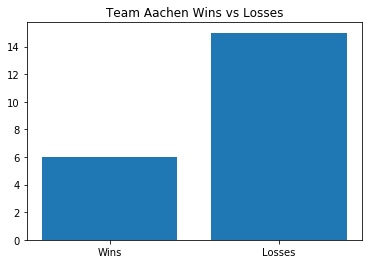

In [65]:
plt.bar(x = [0,1], height = [teams_aachen['wins'].sum(),teams_aachen['losses'].sum()])
plt.title("Team Aachen Wins vs Losses")
plt.xticks([0,1],["Wins","Losses"])

In [53]:
def create_histogram():
    pass

## Calculate Summary Statistics
Calculations and Data transformation to make it appropriate for the MongoDB

In [ ]:
#name of team, total no of goals, total number of wins, histogram as variable, win percentage on days when it rained 

In [54]:
def summary_statistics():
    pass

## Get Weather stats from DarkSky API
Read the documentation for more info

In [ ]:
#use 0s and 1s, then filter as above 

In [55]:
class weather_getter():
    pass

## Load data into MongoDB
1. Name of team
2. Total goals scored during 2011 season 
3. Total wins for 2011 season
4. Histogram of wins/losses 2011
5. Teams win percentage when it was raining

In [56]:
class mongo_handler():
    pass